In [1]:
import numpy as np
import pandas as pd
from numpy.random import rand
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix

In [2]:
import keras
from keras import regularizers
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.layers import Activation,Dense, Dropout, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D 
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

Using TensorFlow backend.


In [3]:
train="Train/"
test="Test/"
train_data = ImageDataGenerator().flow_from_directory(directory=train, target_size=(256, 256), classes = ['Human', 'Not Human'], color_mode='rgb', class_mode='binary', batch_size=10, interpolation='nearest')
test_data = ImageDataGenerator().flow_from_directory(directory=test, target_size=(256, 256), color_mode='rgb', class_mode='binary', batch_size=6, interpolation='nearest')

Found 360 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [4]:
model = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))

In [5]:
out = model.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
total_classes = 2
predictions = Dense(total_classes, activation='softmax')(out)
mymodel = Model(inputs=model.input, outputs=predictions)

In [6]:
mymodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [7]:
for layer in model.layers:
    layer.trainable = False #freeze model

In [8]:
mymodel.compile(Adam(lr=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
mymodel.fit_generator(train_data,
                  steps_per_epoch=10,
                  validation_data=test_data,
                  validation_steps=10,
                  epochs=5,
                  verbose=1)

Epoch 1/5
10/10 [==============================] - 14s 1s/step - loss: 0.7516 - acc: 0.7900 - val_loss: 0.5883 - val_acc: 0.8833
Epoch 2/5
10/10 [==============================] - 9s 914ms/step - loss: 0.0896 - acc: 0.9400 - val_loss: 0.6283 - val_acc: 0.8667
Epoch 3/5
10/10 [==============================] - 9s 916ms/step - loss: 0.0744 - acc: 0.9700 - val_loss: 0.7123 - val_acc: 0.8833
Epoch 4/5
10/10 [==============================] - 9s 920ms/step - loss: 0.0143 - acc: 1.0000 - val_loss: 0.6681 - val_acc: 0.8667
Epoch 5/5
10/10 [==============================] - 9s 922ms/step - loss: 0.0194 - acc: 0.9900 - val_loss: 0.6688 - val_acc: 0.8833


In [10]:
 # plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

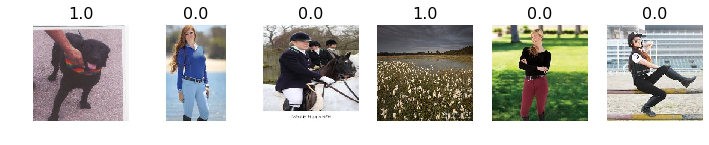

In [11]:
test_img, test_labels = next(test_data)
plots(test_img, titles=test_labels)

In [12]:
prediction = mymodel.predict_generator(test_data, steps=4, verbose=1)
print(len(prediction))

4/4 [==============================] - 1s 374ms/step
24


In [17]:
acc = mymodel.evaluate_generator(test_data, 10)
print(f'The accuracy is {round(acc[1]*100,2)}%')

The accuracy is 88.33%
